# ILAB Kernel (Pytorch) regression notebook

This notebook is intended as a regression notebook for ilab-tensorflow.

Some warnings are expected at the end of this cell, the main purpose is to have pytorch loading.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

print(torch.__version__)

1.13.0


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


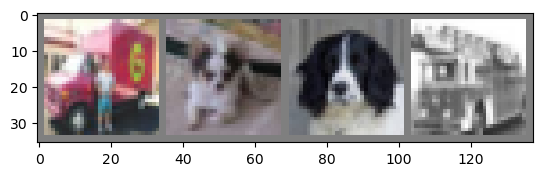

truck dog   dog   truck


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

Some warnings expected at the end of this cell.

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.224
[1,  4000] loss: 1.879
[1,  6000] loss: 1.680
[1,  8000] loss: 1.597
[1, 10000] loss: 1.518
[1, 12000] loss: 1.452
[2,  2000] loss: 1.405
[2,  4000] loss: 1.361
[2,  6000] loss: 1.357
[2,  8000] loss: 1.330
[2, 10000] loss: 1.288
[2, 12000] loss: 1.275
Finished Training


In [7]:
import geopandas as gpd

Expected list with a GPU

In [8]:
torch.cuda.device_count()

1

In [9]:
!env

JUPYTERHUB_CLIENT_ID=jupyterhub-user-jacaraba
SLURM_STEP_ID=0
SLURM_STEP_GPUS=3
SLURM_NODEID=0
SLURM_TASK_PID=1387682
SLURM_PRIO_PROCESS=0
JUPYTERHUB_ADMIN_ACCESS=1
LANG=en_US.UTF-8
SLURM_SUBMIT_DIR=/var/log/jupyterhub
SLURM_STEPID=0
SLURM_SRUN_COMM_HOST=10.100.172.1
SLURM_DISTRIBUTION=cyclic
ROCR_VISIBLE_DEVICES=3
SLURM_PROCID=0
SLURM_JOB_GID=60021
SLURMD_NODENAME=gpu001
SLURM_TASKS_PER_NODE=1
JUPYTERHUB_ACTIVITY_URL=http://gpujh1:8081/jupyterhub-prism/hub/api/users/jacaraba/activity
PROJ_LIB=/panfs/ccds02/app/modules/jupyter/ilab/pytorch-kernel/share/proj
PROJ_DATA=/panfs/ccds02/app/modules/jupyter/ilab/pytorch-kernel/share/proj
SLURM_NNODES=1
USER=jacaraba
JUPYTERHUB_BASE_URL=/jupyterhub-prism/
PAGER=cat
SLURM_LAUNCH_NODE_IPADDR=10.100.172.1
SLURM_GET_USER_ENV=1
SLURM_STEP_TASKS_PER_NODE=1
SLURM_GPUS=1
JPY_PARENT_PID=1387682
PWD=/panfs/ccds02/home/jacaraba
SLURM_JOB_NODELIST=gpu001
HOME=/home/jacaraba
SLURM_CLUSTER_NAME=adaptgpu
SLURM_NODELIST=gpu001
SLURM_GPUS_ON_NODE=1
CLICOLOR=1


Output is expected after this cell.

In [10]:
!ls /panfs/ccds02/app/modules/jupyter/ilab/pytorch-kernel/share/proj

CH			       ITRF2008  nad.lst      projjson.schema.json
deformation_model.schema.json  ITRF2014  other.extra  triangulation.schema.json
GL27			       nad27	 proj.db      world
ITRF2000		       nad83	 proj.ini


In [11]:
from osgeo import gdal
from osgeo import osr
from osgeo import ogr
import numpy as np